<a href="https://colab.research.google.com/github/Fahma-n/Hex/blob/master/driver_drowsiness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [5]:
import os
import cv2

In [6]:
Encoder=OneHotEncoder()
Encoder.fit([[0],[1]])

OneHotEncoder()

In [7]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk("/content/drive/MyDrive/Driver drowsiness/Non Drowsy"):
  for file in f:
    if ".png" in file:
      paths.append(os.path.join(r,file))
for path in paths:
  Img=Image.open(path)
  Img=Img.resize((128,128))
  Img=np.array(Img)
  if(Img.shape==(128,128,3)):
    data.append(np.array(Img))
    result.append(Encoder.transform([[0]]).toarray())

In [8]:
paths=[]

for r,d,f in os.walk("/content/drive/MyDrive/Driver drowsiness/Drowsy"):
  for file in f:
    if ".png" in file:
      paths.append(os.path.join(r,file))
for path in paths:
  Img=Image.open(path)
  Img=Img.resize((128,128))
  Img=np.array(Img)
  if(Img.shape==(128,128,3)):
    data.append(np.array(Img))
    result.append(Encoder.transform([[1]]).toarray())

In [9]:
data=np.array(data)
data.shape

(11555, 128, 128, 3)

In [10]:
result=np.array(result)
result=result.reshape(11555,2)

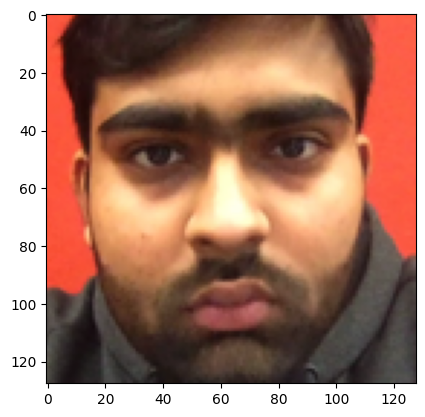

In [11]:
plt.imshow(data[1])

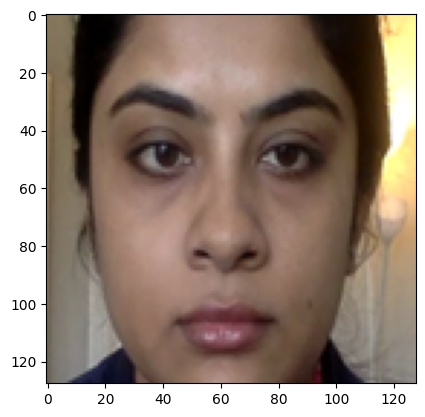

In [12]:
plt.imshow(data[30])

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(data,result,shuffle=True,test_size=0.2,random_state=0)

In [14]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding="same"))
model.add(Conv2D(32,(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,Activation("softmax")))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [15]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
xtrain.shape

(9244, 128, 128, 3)

In [17]:
ytrain.shape

(9244, 2)

In [18]:
history=model.fit(xtrain,ytrain,epochs=3,batch_size=64,verbose=1,validation_data=(xtest,ytest))

Epoch 1/3
145/145 [==============================] - 693s 5s/step - loss: 0.1505 - accuracy: 0.9700 - val_loss: 0.7717 - val_accuracy: 0.8031
Epoch 2/3
145/145 [==============================] - 730s 5s/step - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0774 - val_accuracy: 0.9598
Epoch 3/3
145/145 [==============================] - 760s 5s/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0702 - val_accuracy: 0.9758


In [19]:
loss,accuracy=model.evaluate(xtest,ytest,batch_size=64)

37/37 [==============================] - 43s 1s/step - loss: 0.0702 - accuracy: 0.9758


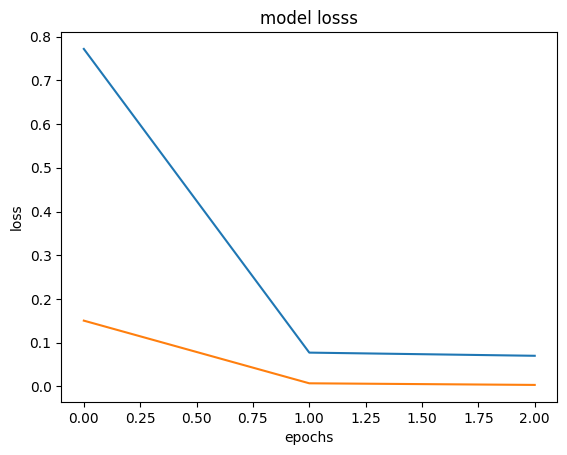

In [20]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.title("model losss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [21]:
def name(s):
  if(s==0):
    return "not drowsy"
  else:
    return "drowsy"

 Person is drowsy


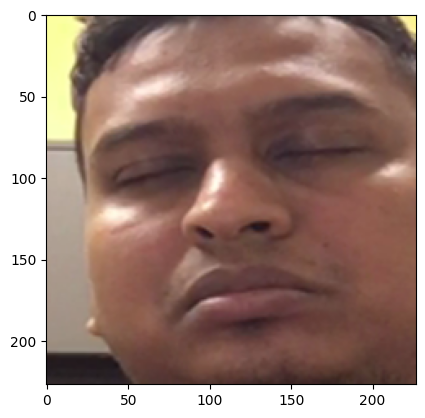

In [22]:
img=Image.open("/content/drive/MyDrive/Driver drowsiness/Drowsy/B0123.png")
x=np.array(img.resize((128,128)))
x=x.reshape(((1,128,128,3)))
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
classification = classification.astype(int)
print( " Person is " + name(classification))

 Person is not drowsy


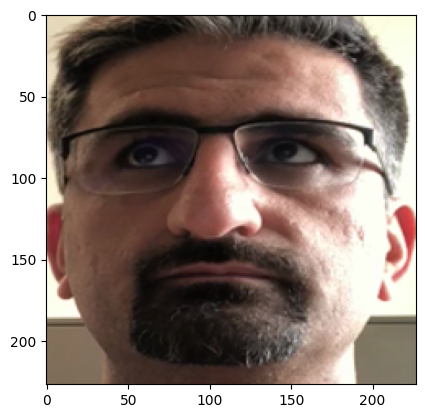

In [23]:
img=Image.open("/content/drive/MyDrive/Driver drowsiness/Non Drowsy/a0009.png")
x=np.array(img.resize((128,128)))
x=x.reshape(((1,128,128,3)))
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
classification = classification.astype(int)
print(" Person is " + name(classification))